In [1]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
wd_path = '/home/hbkoziel/pyfesom/'
save_path = wd_path+'/figures/Arc12/FINAL2/'

#sys.path.append("codes/modules") # add custom Vibe 's modules
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')
#########################################

In [2]:
import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time

import xarray as xr
import pandas as pd

sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean as cmap

No joblib
no cmocean


In [3]:
df_eu_mo = pd.read_pickle(wd_path+'codes/sertemp/Eurasian_basin_monthly')
df_am_mo = pd.read_pickle(wd_path+'codes/sertemp/Amerasian_basin_monthly')
df_sl_mo = pd.read_pickle(wd_path+'codes/sertemp/Slope_basin_monthly')

In [4]:
df_eu_yr = pd.read_pickle(wd_path+'codes/sertemp/Eurasian_basin_yearly')
df_am_yr = pd.read_pickle(wd_path+'codes/sertemp/Amerasian_basin_yearly')
df_sl_yr = pd.read_pickle(wd_path+'codes/sertemp/Slope_basin_yearly')

In [5]:
df_eu_mar = df_eu_mo[df_eu_mo.index.month == 3]
df_am_mar = df_am_mo[df_am_mo.index.month == 3]
df_sl_mar = df_sl_mo[df_sl_mo.index.month == 3]

df_eu_sept = df_eu_mo[df_eu_mo.index.month == 9]
df_am_sept = df_am_mo[df_am_mo.index.month == 9]
df_sl_sept = df_sl_mo[df_sl_mo.index.month == 9]

df_eu_yearlymean = df_eu_mo.resample('YS').mean()
df_am_yearlymean = df_am_mo.resample('YS').mean()
df_sl_yearlymean = df_sl_mo.resample('YS').mean()

In [6]:
df_am_mar["w100m"] *= 24*2600*30
df_eu_mar["w100m"] *= 24*2600*30
df_sl_mar["w100m"] *= 24*2600*30

df_am_sept["w100m"] *= 24*2600*30
df_eu_sept["w100m"] *= 24*2600*30
df_sl_sept["w100m"] *= 24*2600*30

df_am_yearlymean["w100m"] *= 24*2600*30
df_eu_yearlymean["w100m"] *= 24*2600*30
df_sl_yearlymean["w100m"] *= 24*2600*30

df_eu_yr["SAPE"] /= 1000000
df_eu_yr["WAPE"] /= 1000000
df_am_yr["SAPE"] /= 1000000
df_am_yr["WAPE"] /= 1000000
df_sl_yr["SAPE"] /= 1000000
df_sl_yr["WAPE"] /= 1000000

/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

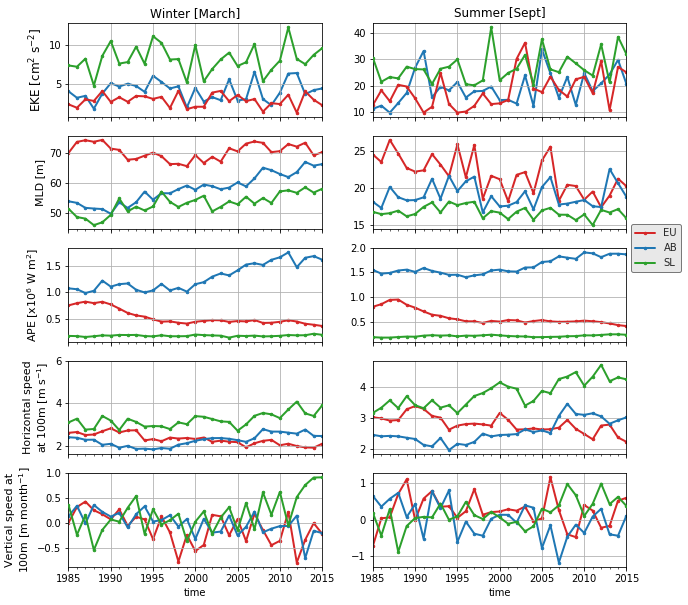

In [7]:
figsize = (10, 10)

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=figsize, constrained_layout=False, sharex=True)#sharey='row'

plt.style.use('seaborn-whitegrid')
#plt.style.use('seaborn-talk')

df_eu_mar['EKE'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax1, legend = False, color = 'tab:blue', zorder =1)
df_am_mar['EKE'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax1, legend = False, color = 'tab:red', zorder =2)
df_sl_mar['EKE'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax1, legend = False, color = 'tab:green', zorder =3)
ax1.set_ylabel('EKE [cm$^{2}$ s$^{-2}$]', fontsize=12)
ax1.set_title('Winter [March]')


df_eu_sept['EKE'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax2, legend = False, color = 'tab:blue', zorder =1)
df_am_sept['EKE'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax2, legend = False, color = 'tab:red', zorder =2)
df_sl_sept['EKE'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax2, legend = False, color = 'tab:green', zorder =3)
ax2.set_title('Summer [Sept]')

df_eu_mar['MLD'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax3, legend = False, color = 'tab:red', zorder =1)
df_am_mar['MLD'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax3, legend = False, color = 'tab:blue', zorder =2)
df_sl_mar['MLD'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax3, legend = False, color = 'tab:green', zorder =3)
ax3.set_ylabel('MLD [m]', fontsize=11)

df_eu_sept['MLD'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax4, legend = False, color = 'tab:red', zorder =1)
df_am_sept['MLD'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax4, legend = False, color = 'tab:blue', zorder =2)
df_sl_sept['MLD'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax4, legend = False, color = 'tab:green', zorder =3)

df_eu_yr['WAPE'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax5, legend = False, color = 'tab:red', zorder =1)
df_am_yr['WAPE'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax5, legend = False, color = 'tab:blue', zorder =2)
df_sl_yr['WAPE'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax5, legend = False, color = 'tab:green', zorder =3)
ax5.set_ylabel('APE [x10$^{6}$ W m$^{2}$]', fontsize=11)

df_eu_yr['SAPE'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax6, legend = False, color = 'tab:red', zorder =1)
df_am_yr['SAPE'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax6, legend = False, color = 'tab:blue', zorder =2)
df_sl_yr['SAPE'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax6, legend = False, color = 'tab:green', zorder =3)
#ax5.set_ylim(130000,780000)
#ax6.set_ylim(130000,780000)

df_eu_mar['cur100m'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax7, legend = False, color = 'tab:red', zorder =1)
df_am_mar['cur100m'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax7, legend = False, color = 'tab:blue', zorder =2)
df_sl_mar['cur100m'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax7, legend = False, color = 'tab:green', zorder =3)
ax7.set_ylabel('Curr speed [m s$^{-1}$]')
df_eu_sept['cur100m'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax8, legend = False, color = 'tab:red', zorder =1)
df_am_sept['cur100m'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax8, legend = False, color = 'tab:blue', zorder =2)
df_sl_sept['cur100m'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax8, legend = False, color = 'tab:green', zorder =3)
ax7.set_ylim(1.6,6)


df_eu_mar['w100m'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax9, legend = False, color = 'tab:red', zorder =1)
df_am_mar['w100m'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax9, legend = False, color = 'tab:blue', zorder =2)
df_sl_mar['w100m'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax9, legend = False, color = 'tab:green', zorder =3)
ax7.set_ylabel('Horizontal speed'+'\n'+'at 100m [m s$^{-1}$]', fontsize=11)

df_eu_sept['w100m'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax10, legend = False, color = 'tab:red', zorder =1)
df_am_sept['w100m'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax10, legend = False, color = 'tab:blue', zorder =2)
df_sl_sept['w100m'].plot(kind = 'line',style='.-',markersize = 5, lw = 2, ax = ax10, legend = False, color = 'tab:green', zorder =3)
ax9.set_ylabel('Vertical speed at'+'\n'+'100m [m month$^{-1}$]', fontsize=11)

#plt.legend({'EB','AB'})
ax6.legend({'SL','AB','EU'}, loc='center left', bbox_to_anchor=(1, 1),frameon=True,facecolor= 'lightgray',edgecolor='k',framealpha=.5)

# df3_yearly_am.plot(kind = 'line',style='.-',markersize = 20, lw = 5, ax = ax2)
# plt.ylabel('area [m$^{2}$]')
# plt.title('Arctic Amerasian basin')

plt.savefig(save_path+'FIG5.png', dpi = 300, bbox_inches='tight') 

In [8]:
# df_eu_yr['SHLD'].plot()
# df_eu_yr['WHLD'].plot()
# df_am_yr['SHLD'].plot()
# df_am_yr['WHLD'].plot()
# plt.legend()

In [9]:
# first_year = 1985
# last_year  = 2015
# years      = np.arange(first_year,last_year+1,1)
# x = df_eu_yr['WHLD'].values-df_eu_mar['MLD'].values # winter
# y = df_eu_yr['SHLD'].values-df_eu_sept['MLD'].values # summer 

# z = df_am_yr['WHLD'].values-df_am_mar['MLD'].values # winter
# w = df_am_yr['SHLD'].values-df_am_sept['MLD'].values # summer 

# plt.plot(years,x, label = 'EU winter')
# plt.plot(years,y, label = 'EU summer')

# plt.plot(years,z, label = 'AM winter')
# plt.plot(years,w, label = 'AM summer')

# # plt.plot(x)
# plt.legend()

In [10]:
df_eu_yr.head()

,ANPP,WAPE,WHLD,SAPE,SHLD
time,,,,,
1985-01-01,1.381343,0.751502,194.579941,0.802035,195.677444
1986-01-01,0.551498,0.793384,197.213882,0.854142,200.452164
1987-01-01,1.839895,0.822574,199.993958,0.941678,215.507538
1988-01-01,2.782928,0.793943,193.549286,0.948806,214.285019
1989-01-01,5.772766,0.820169,198.165939,0.841779,198.598526
